In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#data loading
#filepath = r"D:\william\OneDrive - UW-Madison\UW-Madison\718\PJ3\Climate Project Data.csv"
rawdata = pd.read_csv(filepath).copy()


C:\Users\User\AppData\Local\Temp\ipykernel_11268\3905584784.py:2: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  rawdata = pd.read_csv(r"D:\william\OneDrive - UW-Madison\UW-Madison\718\PJ3\Climate Project Data.csv").copy()


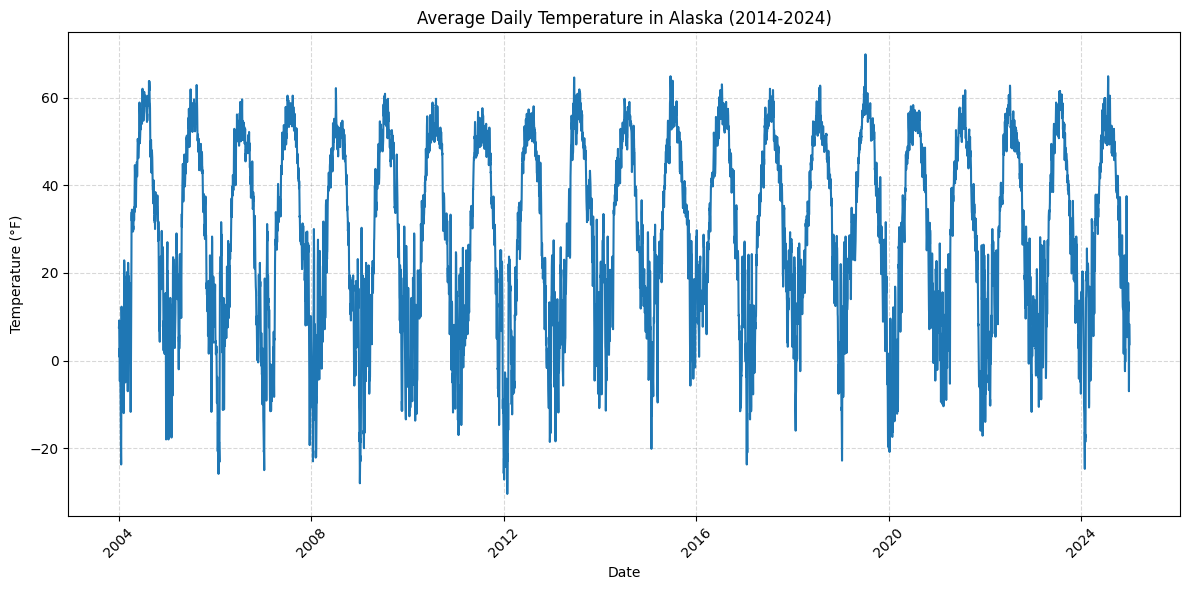

In [ ]:
# Graph 1: Average Daily Temperature in Alaska
df = rawdata[["NAME", "DATE", "DailyAverageDryBulbTemperature"]].copy()
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.dropna().reset_index(drop=True)
df = df.pivot(index="DATE", columns="NAME", values="DailyAverageDryBulbTemperature")
df["Average_Daily_Temperature"] = df.mean(axis=1)
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid(color='gray', alpha=.3, linestyle='--')
sns.lineplot(data=df, x="DATE", y="Average_Daily_Temperature", ax=ax)
plt.title("Average Daily Temperature in Alaska (2004-2024)")
plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"average_daily_temperature_alaska.png")
plt.show()


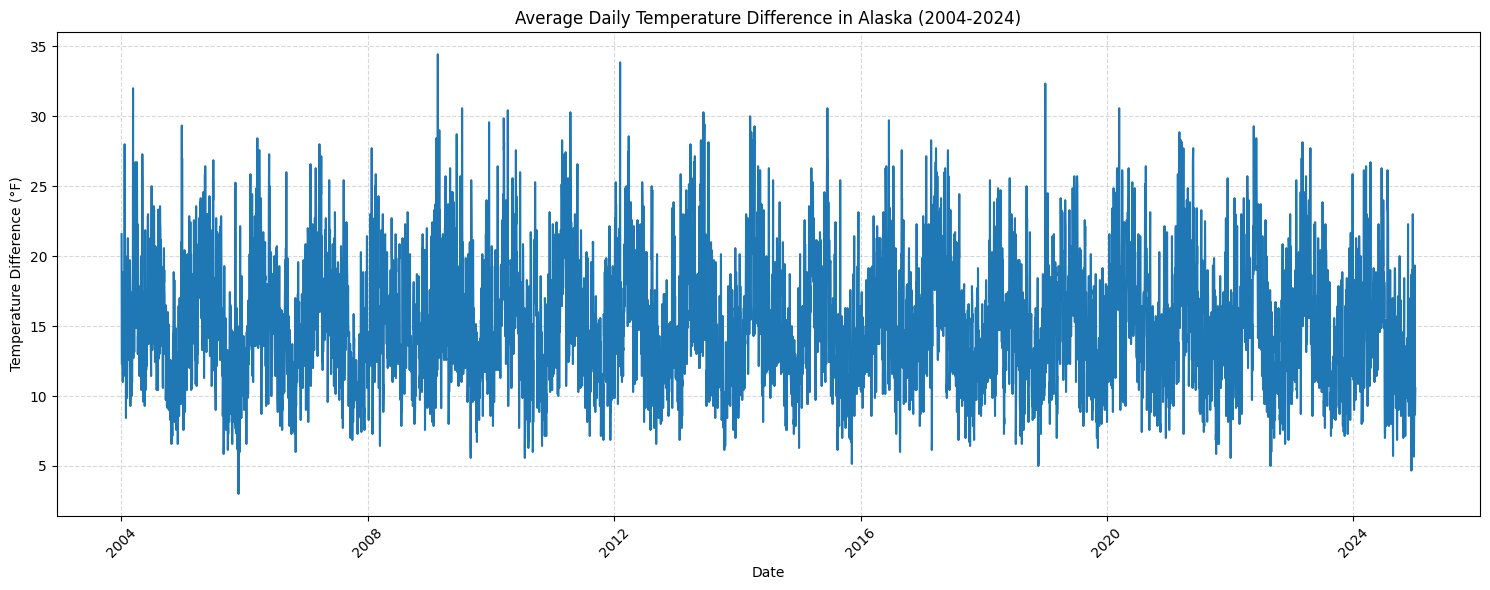

In [32]:
# Graph 2: Average Daily Temperature Difference
df = rawdata[["NAME", "DATE", "DailyMaximumDryBulbTemperature", "DailyMinimumDryBulbTemperature"]].copy()
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.dropna().reset_index(drop=True)
df = df.pivot(index="DATE", columns="NAME", values=["DailyMaximumDryBulbTemperature", "DailyMinimumDryBulbTemperature"])

df["average_max_temp"] = df[[col for col in df.columns if col[0] == "DailyMaximumDryBulbTemperature"]].mean(axis=1)
df["average_min_temp"] = df[[col for col in df.columns if col[0] == "DailyMinimumDryBulbTemperature"]].mean(axis=1)
df["temperature_difference"] = df["average_max_temp"] - df["average_min_temp"]

fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='gray', alpha=.3, linestyle='--')
sns.lineplot(data=df, x="DATE", y="temperature_difference", ax=ax)
plt.title("Average Daily Temperature Difference in Alaska (2004-2024)")
plt.xlabel("Date")
plt.ylabel("Temperature Difference (°F)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"average_daily_temperature_difference_alaska.png")
plt.show()

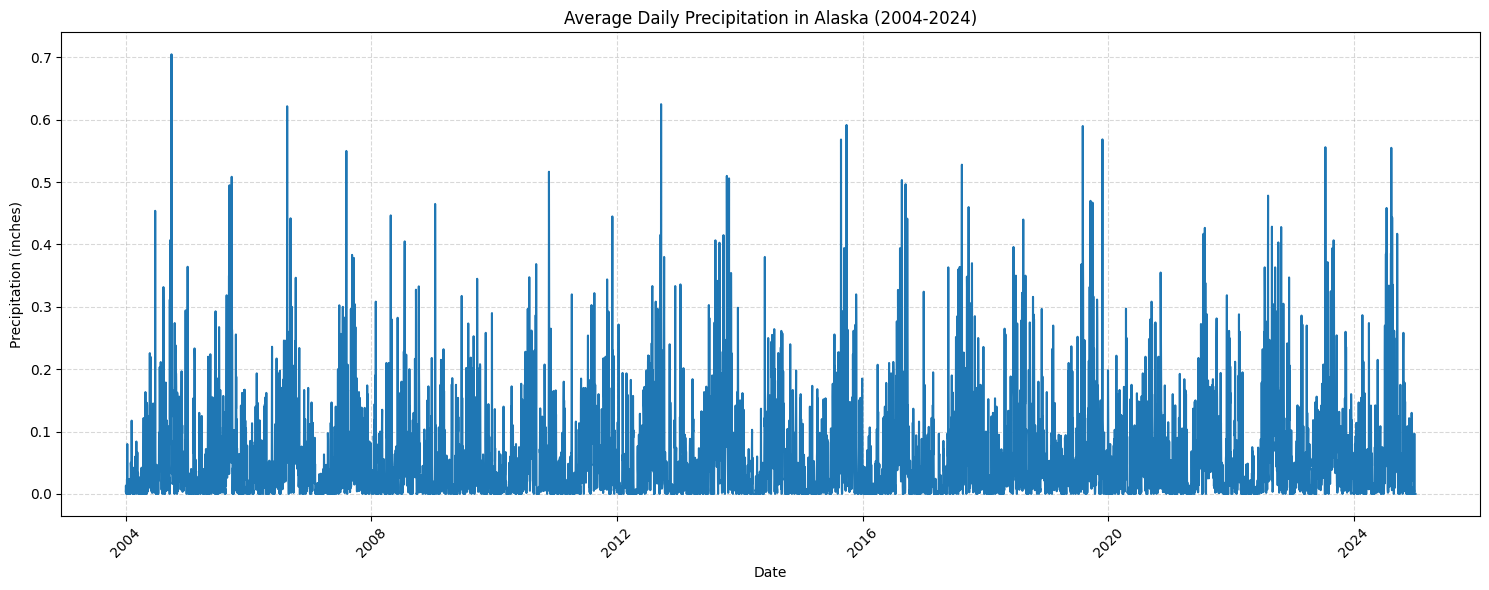

In [37]:
# Graph 3: Average Daily Precipitation
df = rawdata[["NAME", "DATE", "DailyPrecipitation"]].copy()
df["DATE"] = pd.to_datetime(df["DATE"])
df["DailyPrecipitation"] = pd.to_numeric(df["DailyPrecipitation"], errors="coerce")
df = df.dropna(subset=["DailyPrecipitation"]).reset_index(drop=True)
df = df.pivot(index="DATE", columns="NAME", values="DailyPrecipitation")
df["Average_Daily_Precipitation"] = df.mean(axis=1)
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='gray', alpha=.3, linestyle='--')
sns.lineplot(data=df, x="DATE", y="Average_Daily_Precipitation", ax=ax)
plt.title("Average Daily Precipitation in Alaska (2004-2024)")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"average_daily_precipitation_alaska.png")
plt.show()

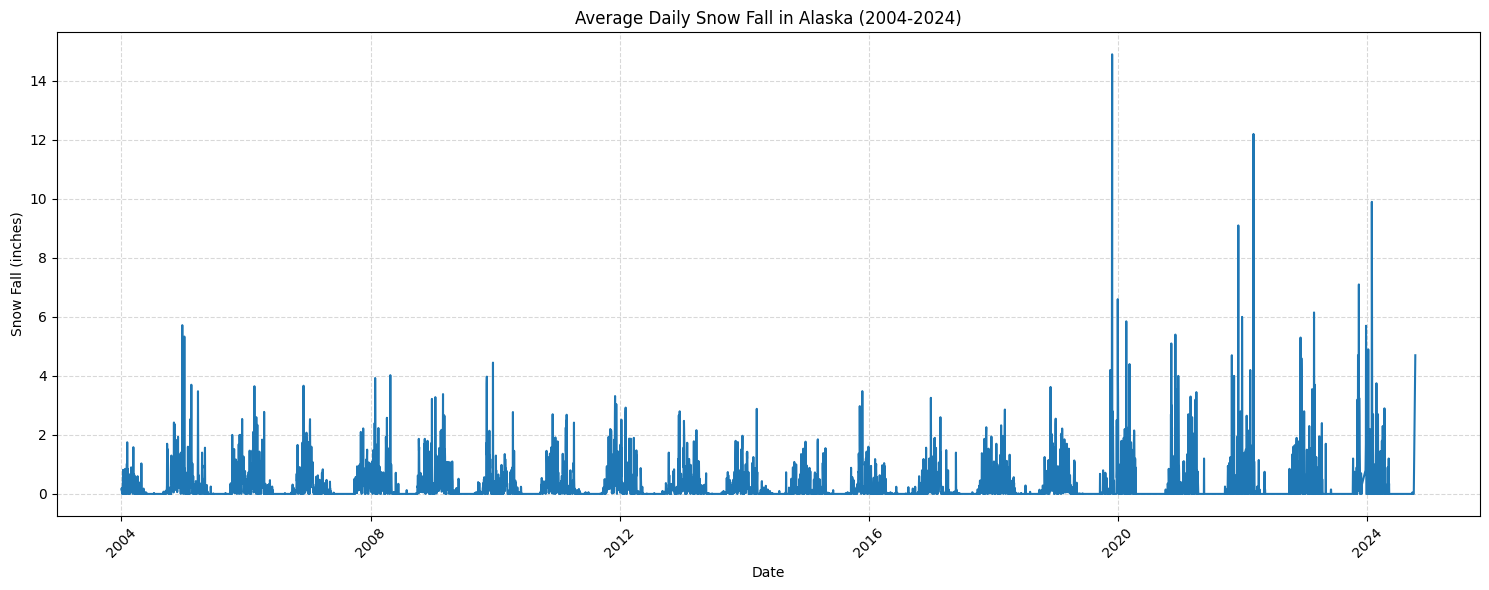

In [41]:
# Graph 4: Average Daily Snow Fall
df = rawdata[["NAME", "DATE", "DailySnowfall"]].copy()
df["DATE"] = pd.to_datetime(df["DATE"])
df["DailySnowfall"] = pd.to_numeric(df["DailySnowfall"], errors="coerce")
df = df.dropna(subset=["DailySnowfall"]).reset_index(drop=True)
df = df.pivot(index="DATE", columns="NAME", values="DailySnowfall")
df["Average_Daily_Snow_Fall"] = df.mean(axis=1)
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='gray', alpha=.3, linestyle='--')
sns.lineplot(data=df, x="DATE", y="Average_Daily_Snow_Fall", ax=ax)
plt.title("Average Daily Snow Fall in Alaska (2004-2024)")
plt.xlabel("Date")
plt.ylabel("Snow Fall (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"average_daily_snow_fall_alaska.png")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_11268\2505524609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=snow_days, x="Year", y="Snow_Days", ax=ax, palette="Blues_d")


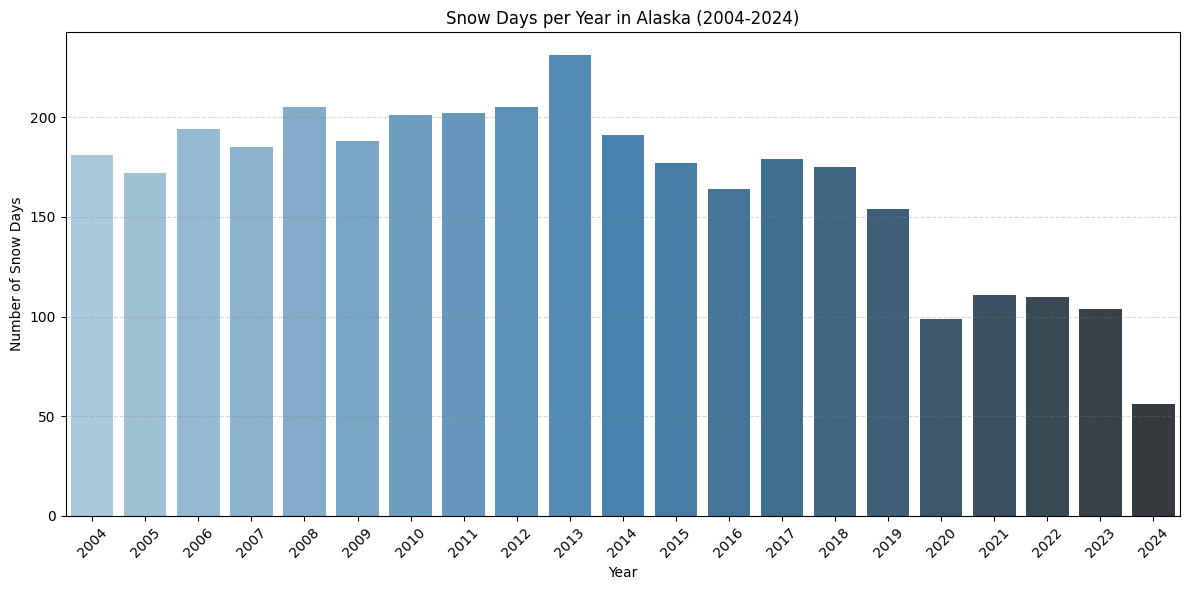

In [43]:
# Graph 5: Snow Days per Year
df = df.reset_index()
df["Year"] = df["DATE"].dt.year
snow_days = df.groupby("Year")["Average_Daily_Snow_Fall"].apply(lambda x: (x > 0).sum()).reset_index()
snow_days.columns = ["Year", "Snow_Days"]
fig, ax = plt.subplots(figsize=(12, 6))
ax.grid(color='gray', alpha=.3, linestyle='--')
sns.barplot(data=snow_days, x="Year", y="Snow_Days", ax=ax, palette="Blues_d")
plt.title("Snow Days per Year in Alaska (2004-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Snow Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"snow_days_per_year_alaska.png")
plt.show()


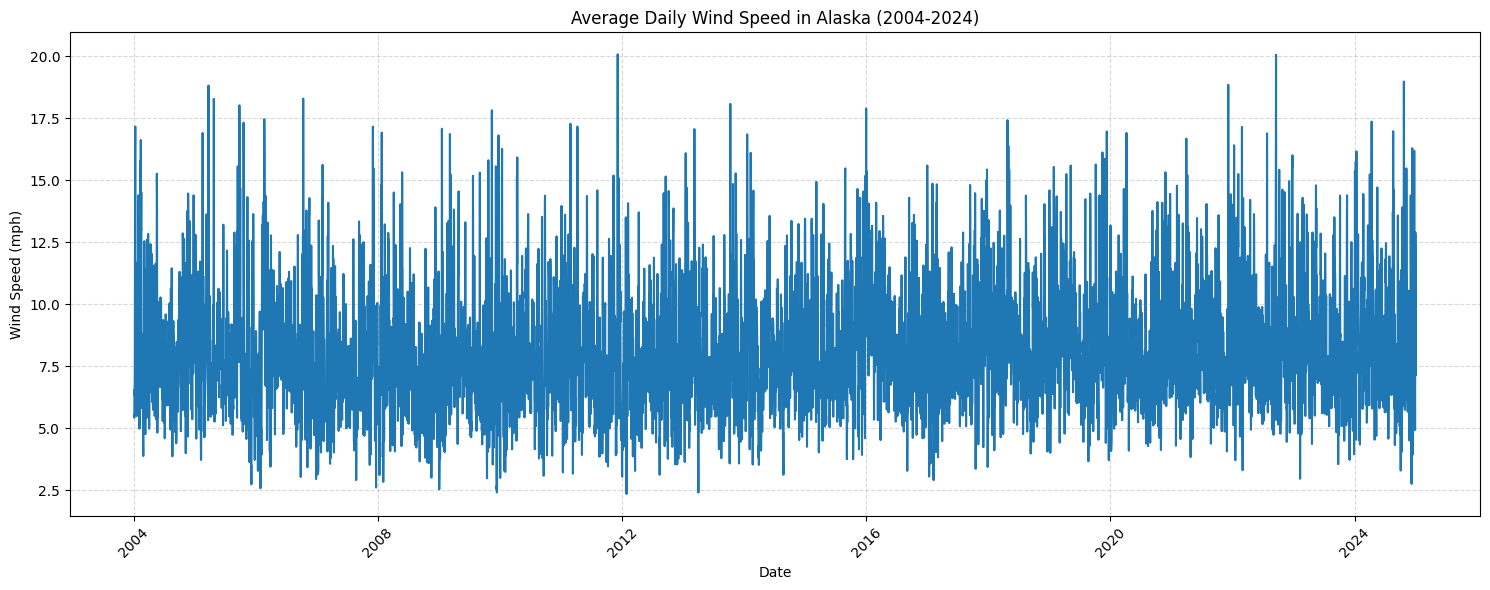

In [44]:
# Graph 6: Average Wind Speed
df = rawdata[["NAME", "DATE", "DailyAverageWindSpeed"]].copy()
df["DATE"] = pd.to_datetime(df["DATE"])
df["DailyAverageWindSpeed"] = pd.to_numeric(df["DailyAverageWindSpeed"], errors="coerce")
df = df.dropna(subset=["DailyAverageWindSpeed"]).reset_index(drop=True)
df = df.pivot(index="DATE", columns="NAME", values="DailyAverageWindSpeed")
df["Average_Daily_Wind_Speed"] = df.mean(axis=1)
fig, ax = plt.subplots(figsize=(15, 6))
ax.grid(color='gray', alpha=.3, linestyle='--')
sns.lineplot(data=df, x="DATE", y="Average_Daily_Wind_Speed", ax=ax)
plt.title("Average Daily Wind Speed in Alaska (2004-2024)")
plt.xlabel("Date")
plt.ylabel("Wind Speed (mph)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"average_daily_wind_speed_alaska.png")
plt.show()